In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [ ]:
selected_columns = [
    'bant_submit', 'customer_country', 'business_unit', 'com_reg_ver_win_rate',
    'customer_idx', 'customer_type', 'enterprise', 'historical_existing_cnt',
    'id_strategic_ver', 'it_strategic_ver', 'idit_strategic_ver', 'customer_job',
    'lead_desc_length', 'inquiry_type', 'product_category', 'product_subcategory',
    'product_modelname', 'customer_country.1', 'customer_position',
    'response_corporate', 'expected_timeline', 'ver_cus', 'ver_pro',
    'ver_win_rate_x', 'ver_win_ratio_per_bu', 'business_area', 'business_subarea',
    'lead_owner'
]

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_file_path = '/content/drive/MyDrive/LGdata/train.csv'

df = pd.read_csv(train_file_path)

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

End Customer 별 is_converted 비율: 13.79%, 전체 갯수: 10643, is_converted된 갯수: 1468
Specifier / Influencer 별 is_converted 비율: 7.94%, 전체 갯수: 2568, is_converted된 갯수: 204
Channel Partner 별 is_converted 비율: 12.13%, 전체 갯수: 1368, is_converted된 갯수: 166
Service Partner 별 is_converted 비율: 14.04%, 전체 갯수: 349, is_converted된 갯수: 49
Solution Eco-Partner 별 is_converted 비율: 29.45%, 전체 갯수: 146, is_converted된 갯수: 43
Installer/Contractor 별 is_converted 비율: 1.92%, 전체 갯수: 52, is_converted된 갯수: 1
Corporate 별 is_converted 비율: 0.00%, 전체 갯수: 31, is_converted된 갯수: 0
HVAC Engineer 별 is_converted 비율: 0.00%, 전체 갯수: 23, is_converted된 갯수: 0
Engineer 별 is_converted 비율: 0.00%, 전체 갯수: 20, is_converted된 갯수: 0
Developer 별 is_converted 비율: 0.00%, 전체 갯수: 17, is_converted된 갯수: 0


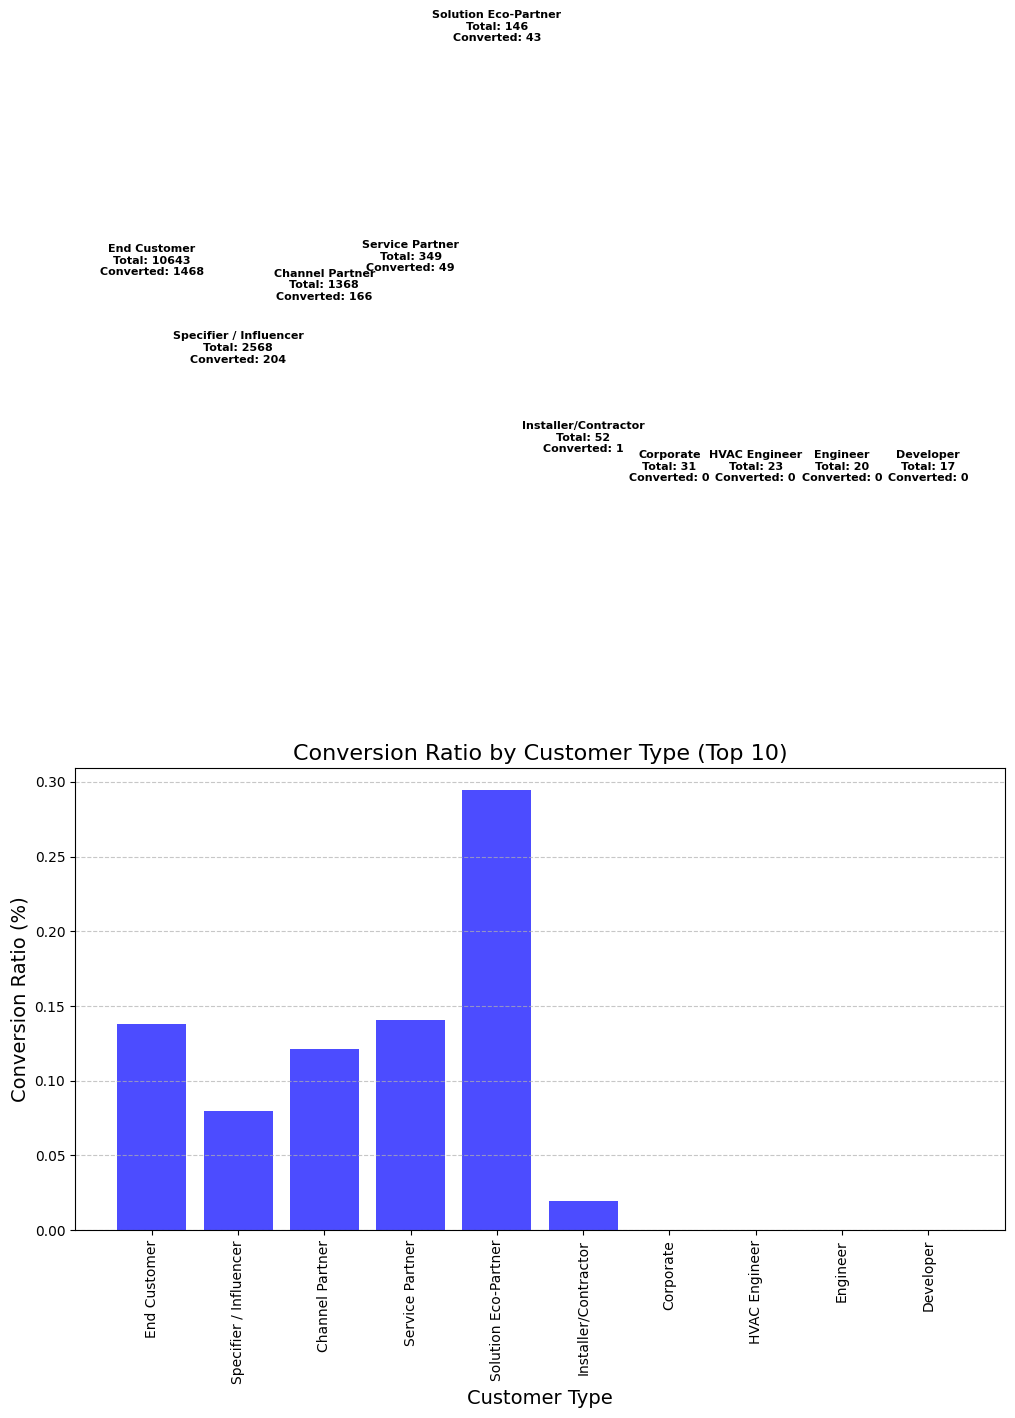

In [55]:
df['customer_type'] = df['customer_type'].replace('End-Customer', 'End Customer')
df['customer_type'] = df['customer_type'].replace('Specifier/ Influencer', 'Specifier / Influencer')

df_customer_type = df.dropna(subset=['customer_type'])

converted_counts_customer_type = df_customer_type.groupby('customer_type')['is_converted'].sum().reset_index()
total_counts_customer_type = df_customer_type.groupby('customer_type')['is_converted'].count().reset_index()

ratio_df_customer_type = pd.merge(converted_counts_customer_type, total_counts_customer_type, on='customer_type', how='left')
ratio_df_customer_type['conversion_ratio'] = ratio_df_customer_type['is_converted_x'] / ratio_df_customer_type['is_converted_y']

top_10_customer_types = ratio_df_customer_type.nlargest(10, 'is_converted_y')
for index, row in top_10_customer_types.iterrows():
    total = int(row['is_converted_y'])
    converted = int(row['is_converted_x'])
    ratio = row['conversion_ratio'] * 100
    print(f"{row['customer_type']} 별 is_converted 비율: {ratio:.2f}%, 전체 갯수: {total}, is_converted된 갯수: {converted}")

plt.figure(figsize=(12, 6))
bars = plt.bar(top_10_customer_types['customer_type'], top_10_customer_types['conversion_ratio'], color='blue', alpha=0.7)
plt.title('Conversion Ratio by Customer Type (Top 10)', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Conversion Ratio (%)', fontsize=14)
plt.xticks(rotation='vertical')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, label in zip(bars, top_10_customer_types['customer_type']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f"{label}\nTotal: {int(top_10_customer_types[top_10_customer_types['customer_type'] == label]['is_converted_y'])}\nConverted: {int(top_10_customer_types[top_10_customer_types['customer_type'] == label]['is_converted_x'])}",
             ha='center', va='bottom', fontsize=8, color='black', weight='bold')

plt.show()
